In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("avocado.csv")
data.drop("Unnamed: 0", axis=1).head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
data = data.drop("Unnamed: 0", axis=1)

In [5]:
data = data.drop("Date", axis=1)

In [6]:
data = data.join( pd.get_dummies( data["type"] ) ).drop( "type", axis=1 )

In [7]:
data = data.drop("region", axis=1)

In [8]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,True,False
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,True,False
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,True,False
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,True,False
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,True,False


In [9]:
data["Total Sold"] = data["4046"] + data["4225"] + data["4770"]

In [10]:
arr = np.array(data["year"], dtype=object)
for i in range(len(arr)):
    arr[i] = str(arr[i])
    
data["year"] = arr
arr

array(['2015', '2015', '2015', ..., '2018', '2018', '2018'], dtype=object)

In [11]:
data = data.join( pd.get_dummies( data["year"] ) ).drop("year", axis=1)

<Axes: >

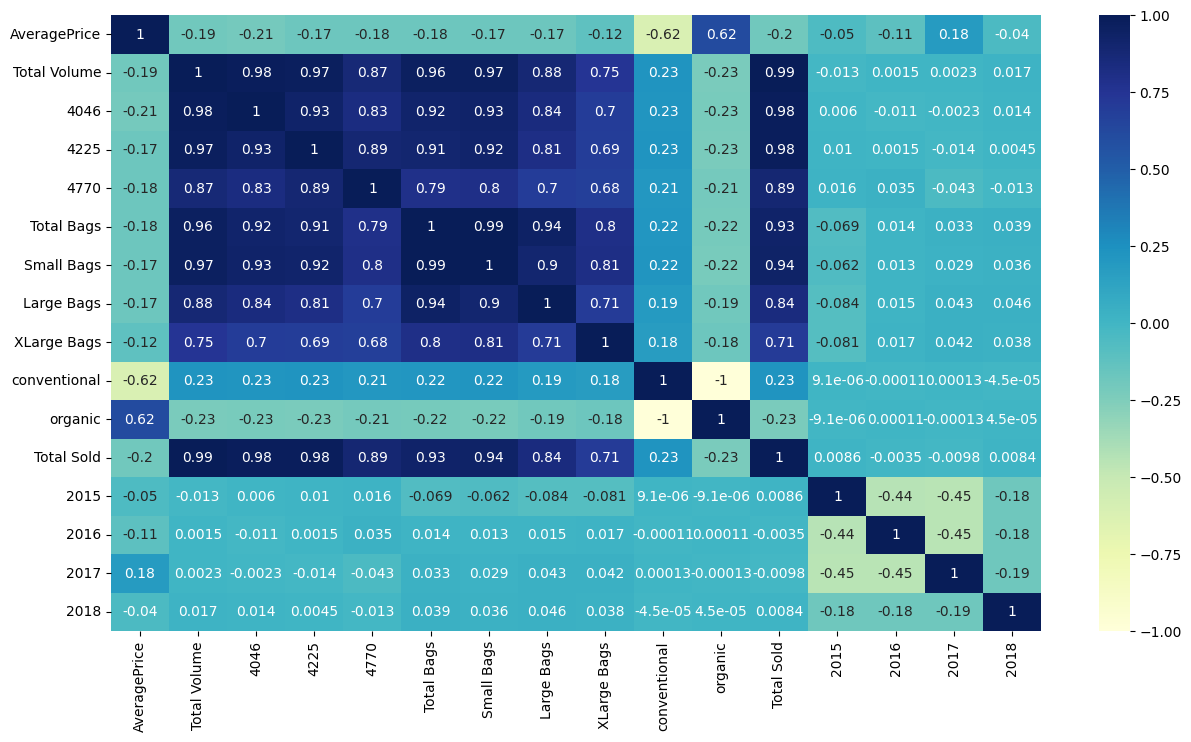

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap( data.corr(), annot=True, cmap="YlGnBu" )

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop( "AveragePrice", axis=1 )
y = data["AveragePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [16]:
reg.score(X_test, y_test)

0.42947359448188915

In [25]:
['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'conventional', 'organic', 'Total Sold',
       '2015', '2016', '2017', '2018'].index("organic")
# X_train.keys()

9

In [28]:
len(X_train_s[:, 9])

14599

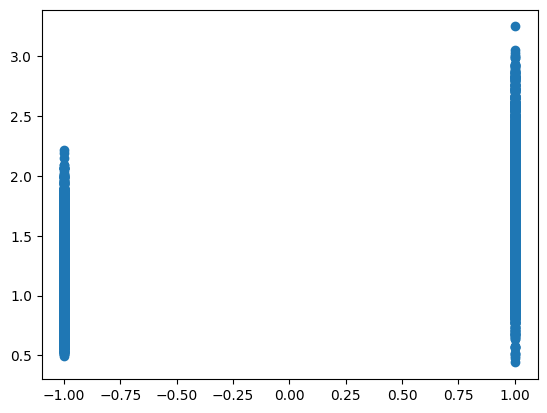

In [29]:
plt.scatter(X_train_s[:, 9], y_train)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

In [ ]:
forest.score(X_test_s, y_test)